<a href="https://colab.research.google.com/github/IsuruMDasanayake/Traffic-Control-System-Fuzzy/blob/main/TrafficControlFuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Traffic Control System**

In [ ]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import matplotlib.pyplot as plt


**Define Input and Output Variables**

In [ ]:
# Define input variables
density = ctrl.Antecedent(np.arange(0, 101, 1), 'density')
waiting_time = ctrl.Antecedent(np.arange(0, 11, 1), 'waiting_time')

# Define output variable
light_duration = ctrl.Consequent(np.arange(10, 61, 1), 'light_duration')


**Membership functions**

In [ ]:
# Membership functions for Density
density['low'] = fuzz.trapmf(density.universe, [0, 0, 20, 40])
density['medium'] = fuzz.trimf(density.universe, [20, 50, 80])
density['high'] = fuzz.trapmf(density.universe, [60, 80, 100, 100])

# Membership functions for Waiting Time
waiting_time['short'] = fuzz.trimf(waiting_time.universe, [0, 0, 4])
waiting_time['medium'] = fuzz.trimf(waiting_time.universe, [2, 5, 8])
waiting_time['long'] = fuzz.trapmf(waiting_time.universe, [6, 8, 10, 10])

# Membership functions for Light Duration
light_duration['short'] = fuzz.trapmf(light_duration.universe, [10, 10, 20, 30])
light_duration['moderate'] = fuzz.trimf(light_duration.universe, [20, 35, 50])
light_duration['long'] = fuzz.trapmf(light_duration.universe, [40, 50, 60, 60])


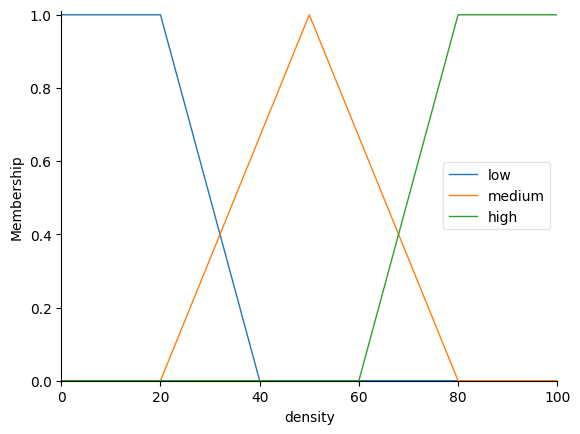

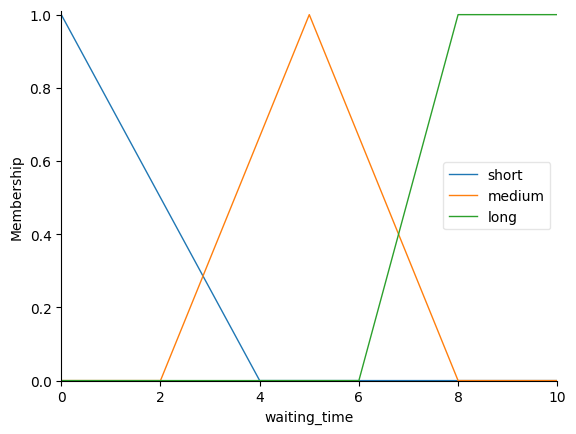

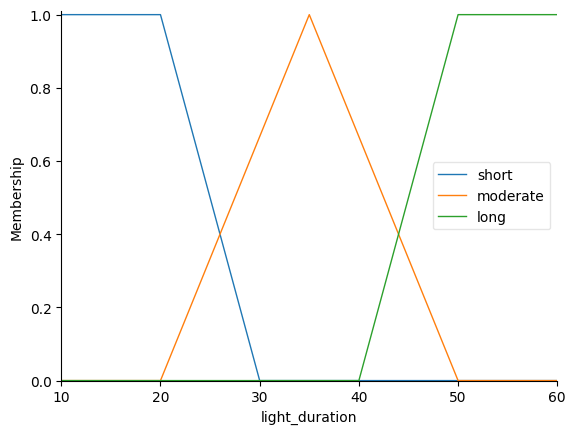

In [ ]:
density.view()
waiting_time.view()
light_duration.view()
plt.show()


**Define Fuzzy Rules**

In [ ]:
# Define fuzzy rules
rule1 = ctrl.Rule(density['high'] & waiting_time['long'], light_duration['long'])
rule2 = ctrl.Rule(density['medium'] & waiting_time['medium'], light_duration['moderate'])
rule3 = ctrl.Rule(density['low'] | waiting_time['short'], light_duration['short'])
rule4 = ctrl.Rule(density['high'] & waiting_time['short'], light_duration['moderate'])
rule5 = ctrl.Rule(density['medium'] & waiting_time['long'], light_duration['long'])


**Control System**

In [ ]:
# Create a control system
traffic_control = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])

# Create a simulation
traffic_simulation = ctrl.ControlSystemSimulation(traffic_control)


**Test**

In [ ]:
# Scenario 1
traffic_simulation.input['density'] = 85
traffic_simulation.input['waiting_time'] = 9

# Compute output
traffic_simulation.compute()
print(f"Scenario 1 - Light Duration: {traffic_simulation.output['light_duration']:.2f} seconds")


Scenario 1 - Light Duration: 52.22 seconds


In [ ]:
# Scenario 2
traffic_simulation.input['density'] = 35
traffic_simulation.input['waiting_time'] = 3

# Compute output
traffic_simulation.compute()
print(f"Scenario 2 - Light Duration: {traffic_simulation.output['light_duration']:.2f} seconds")


Scenario 2 - Light Duration: 30.00 seconds


In [ ]:
# Scenario 3
traffic_simulation.input['density'] = 65
traffic_simulation.input['waiting_time'] = 7

# Compute output
traffic_simulation.compute()
print(f"Scenario 3 - Light Duration: {traffic_simulation.output['light_duration']:.2f} seconds")


Scenario 3 - Light Duration: 43.11 seconds


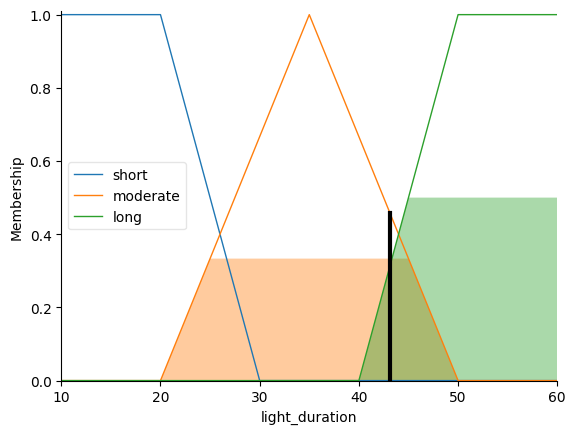

In [ ]:
light_duration.view(sim=traffic_simulation)
plt.show()